In [3]:
print("Hello World!")

Hello World!

In [4]:
println("Hello World~")

Hello World~


In [5]:
println(π+1)

4.141592653589793


In [1]:
using Plots
gr(); #";" is just used to suppress outputs

Plots.GRBackend()

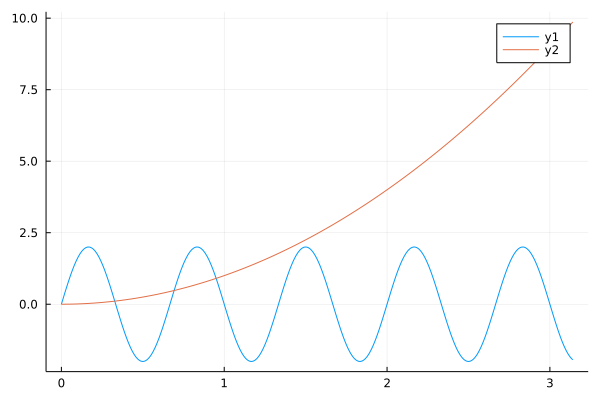

In [24]:
x = collect(0:0.001:pi);
plot(x,2*sin.(3*π*x))  #sin.(x), the "." before the x references
                       # that x is an array, applying func element-wise
                       # "broadcasting"=apply element-wise
plot!(x,x.^2)          #"!" modifies an existing object

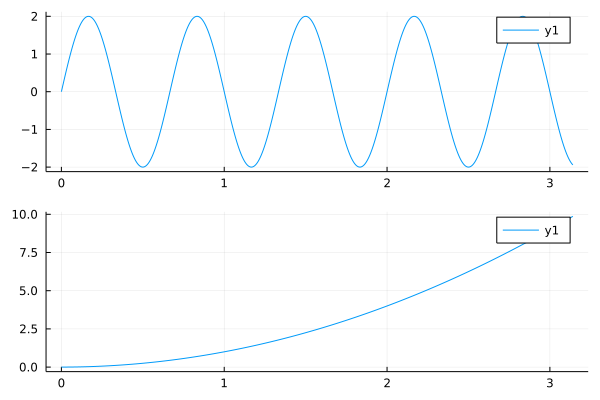

In [21]:
p1 = plot(x,2*sin.(3*π*x))
p2 = plot(x,x.^2)
plot(p1,p2,layout=(2,1))

In [25]:
#Julia starts arrays with 1 instead of 0
arr = reshape(collect(1:16),(4,4))

4×4 Matrix{Int64}:
 1  5   9  13
 2  6  10  14
 3  7  11  15
 4  8  12  16

In [27]:
sites = CartesianIndices(arr)

4×4 CartesianIndices{2, Tuple{Base.OneTo{Int64}, Base.OneTo{Int64}}}:
 CartesianIndex(1, 1)  CartesianIndex(1, 2)  …  CartesianIndex(1, 4)
 CartesianIndex(2, 1)  CartesianIndex(2, 2)     CartesianIndex(2, 4)
 CartesianIndex(3, 1)  CartesianIndex(3, 2)     CartesianIndex(3, 4)
 CartesianIndex(4, 1)  CartesianIndex(4, 2)     CartesianIndex(4, 4)

In [28]:
for site in sites
    println(arr[site])
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [1]:
print("Pranav and Simon and Chris are *AWESOME!!!*")

Pranav and Simon and Chris are *AWESOME!!!*

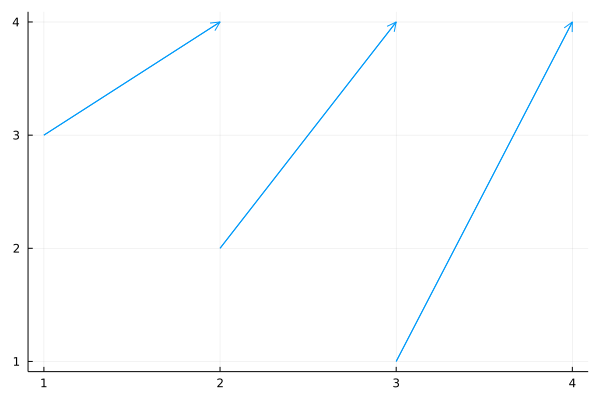

In [4]:
#quiver(x,y,quiver=(u,v))
#quiver!(x,y,quiver=(u,v))

quiver([1,2,3],[3,2,1],quiver=([1,1,1],[1,2,3]))

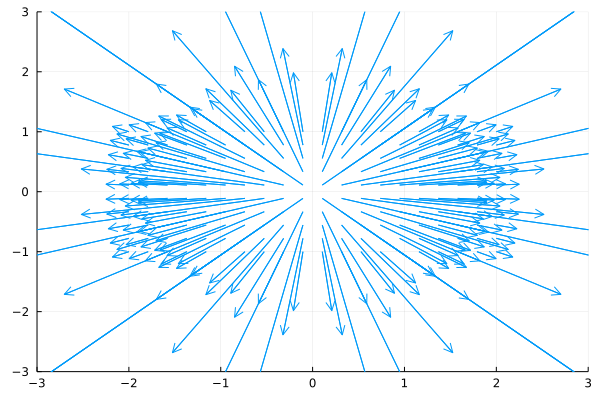

In [31]:
#Example point charge
x = repeat(LinRange(-2, 2, 20), inner=10)
y = repeat(LinRange(-1, 1, 10), outer=20)
u = 1 ./ (x.^2 .+ y.^2).^(3/2) .* x
v = 1 ./ (x.^2 .+ y.^2).^(3/2) .* y
# Plot arrows
quiver(x, y, quiver=(u, v), arrowscale=0.1,ylim=(-3,3), xlim=(-3,3))

# Expand the y-axes to see the whole arrows
#ylims(-1.15, 1.15)

In [63]:
function E_x(x,y,a)
   return (x.-a) ./ ((x.-a).^2 .+ y.^2).^(3/2) .- (x.+a) ./ ((x.+a).^2 .+ y.^2).^(3/2)
    
end

E_x (generic function with 1 method)

In [64]:
function E_y(x,y,a)
   return y ./ ((x.-a).^2 .+ y.^2).^(3/2) .- y ./ ((x.+a).^2 .+ y.^2).^(3/2)
    
end

E_y (generic function with 1 method)

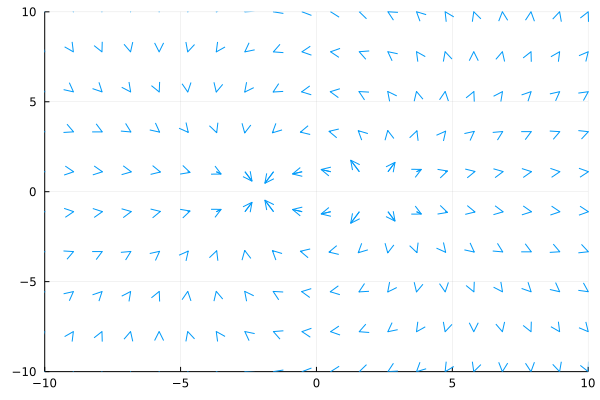

In [65]:
#Example dipole charge
x = repeat(LinRange(-10, 10, 20), inner=10)
y = repeat(LinRange(-10, 10, 10), outer=20)

a=2

#u = x ./ (x.^2 .+ y.^2).^(3/2) 
#v = y ./ (x.^2 .+ y.^2).^(3/2)

u = E_x(x,y,a)
v = E_y(x,y,a)

# Plot arrows
quiver(x, y, quiver=(u, v), arrowscale=0.1,ylim=(-10,10), xlim=(-10,10))

# Expand the y-axes to see the whole arrows
#ylims(-1.15, 1.15)